In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zss import simple_distance, Node

In [59]:
df = pd.read_excel('chai.xlsx', engine='openpyxl')

In [60]:
df['Время заваривания (секунд)'] = df['Время заваривания (секунд)'].astype(int)

In [61]:
df

,ID,Название,Категория,Форма упаковки,Есть ароматизатор,Температура заваривания C,Время заваривания (секунд),Состав,Вкус,стоимость
0,0,Путь Сердца,Пуэр,Прессованный,False,90,20,Тэнг Мэнхай Да Е Шу Ча и Цзинь Я Дянь Хун Ча,"плотный, мягкий, бархатистый, сладковатый",720
1,1,Юцзи Гаоцзи Шу Ч,Пуэр,Россыпь,False,95,10,Чай пуэр,"плотный, мягкий, маслянистый",1760
2,2,Цзы Цзюань Ча,Пуэр,Россыпь,False,90,15,Чай пуэр,"плотный, маслянистый, терпкий, сладковатый",1300
3,3,Юньнань Бай Хао Бай Ча,Пуэр,Россыпь,False,90,15,Чай пуэр,"плотный, шелковистый, сладковатый",1760
4,4,Цзинмай Шэн Ча,Пуэр,Прессованный,False,95,15,Чай пуэр,"плотный, маслянистый, вяжущий",1960
5,5,Шайцинь Юцзи Шэн,Пуэр,Россыпь,False,80,15,Чай пуэр,"плотный, маслянистый, терпкий",1470
6,6,Те Гуаньинь Тулоу,Улун,Россыпь,False,80,15,Чай Улун,"сочный, сладкий, насыщенный, шелковистый",590
7,7,Хуан Чжисян,Улун,Россыпь,False,90,10,Чай Улун,"плотный, терпкий, пряный, сладковатый",1860
8,8,Чэнь Мэй Чжань,Улун,Россыпь,False,92,7,побеги сорта Мэйчжань,"плотный, мягкий, шелковистый, сладковатый",4890
9,9,Лишань Улун Циньвэй,Улун,Россыпь,False,85,10,Скрученные чайные побеги,"плотный, гладкий, маслянистый, сладкий",5900


In [62]:
tastes = np.array(df['Вкус'])
tastes

array(['плотный, мягкий, бархатистый, сладковатый',
       'плотный, мягкий, маслянистый',
       'плотный, маслянистый, терпкий, сладковатый',
       'плотный, шелковистый, сладковатый',
       'плотный, маслянистый, вяжущий', 'плотный, маслянистый, терпкий',
       'сочный, сладкий, насыщенный, шелковистый',
       'плотный, терпкий, пряный, сладковатый',
       'плотный, мягкий, шелковистый, сладковатый',
       'плотный, гладкий, маслянистый, сладкий',
       'плотный, мягкий, сладкий, маслянистый',
       'чистый, гладкий, сладкий, маслянистый',
       'сочный, шелковистый, пряный, терпкий',
       'тонкий, шелковистый, сладковатый, вяжущий',
       'легкий, мягкий, шелковистый', 'плотный, гладкий, вяжущий',
       'нейтральный, кислый', 'плотный, маслянистый, сладковатый',
       'плотный, маслянистый, терпкий', 'плотный, мягкий, шелковистый',
       'мягкий, плотный, маслянистый, сочный, сладковатый', 'Персик',
       'Барбарис, земляника'], dtype=object)

In [63]:
# функция, которая создает дерево вкусов
def create_node(extra_node, object):
    extra = object.split('; ')
    new_list = []
    for element in extra:
        if ',' in element:
            new_list.append(element.split(', '))
        else:
            new_list.append(element)
    for item in new_list:
        if type(item) == list:
            next_node = Node(item[0])
            for i in range(1, len(item)):
                next_node.addkid(Node(item[i]))
            extra_node.addkid(next_node)
        else:
            extra_node.addkid(Node(item))

In [64]:
# Древесная мера близости по основному вкусовому оттенку
objects = tastes
matrix_tree_main = np.zeros((objects.shape[0], objects.shape[0]))
for i in range(objects.shape[0]):
    for j in range(objects.shape[0]):
        main_taste_node_1 = Node("Основной")
        create_node(main_taste_node_1, objects[i])
        main_taste_node_2 = Node("Основной")
        create_node(main_taste_node_2, objects[j])
        matrix_tree_main[i, j] = simple_distance(main_taste_node_1, main_taste_node_2)

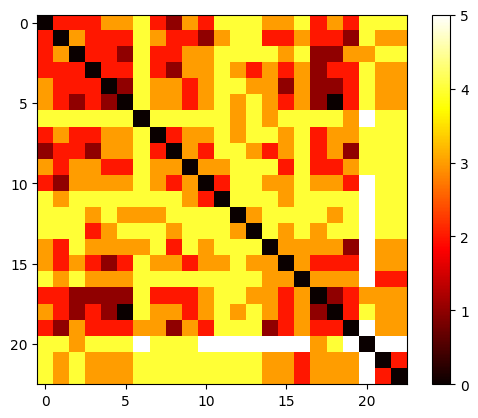

In [65]:
# Построение матрицы с цветовыми значениями
plt.imshow(matrix_tree_main, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [66]:
class TeaCat:
    def __init__(self, name, par) -> None:
        self.name = name
        self.par = par
        self.children = []
        if par is not None:
            par.children.append(self)

In [67]:
catRoot = TeaCat('root', None)
catSublim = TeaCat('Растворимый', catRoot)
catCustard = TeaCat('Заварной', catRoot)
catHerbal = TeaCat('Травяной', catCustard)
catTea = TeaCat('Чайный', catCustard)
catGreen = TeaCat('ЗЕЛЕНЫЙ ЧАЙ', catTea)
catRed = TeaCat('КРАСНЫЙ ЧАЙ', catTea)
catWhite = TeaCat('БЕЛЫЙ ЧАЙ', catTea)
catYellow = TeaCat('ЖЕЛТЫЙ ЧАЙ', catTea)
catOolong = TeaCat('Улун', catTea)
catPuer = TeaCat('Пуэр', catTea)
catGaba = TeaCat('Габа', catTea)

In [68]:
cats = {
    'root': catRoot,
    'Растворимый': catSublim,
    'Заварной': catCustard,
    'Травяной': catHerbal,
    'Чайный': catTea,
    'ЗЕЛЕНЫЙ ЧАЙ': catGreen,
    'БЕЛЫЙ ЧАЙ': catWhite,
    'ЖЕЛТЫЙ ЧАЙ': catYellow,
    'КРАСНЫЙ ЧАЙ': catRed,
    'Улун': catOolong,
    'Пуэр': catPuer,
    'Габа': catGaba,
}

In [69]:
def metricTree(a, b):
    c1, c2 = cats[a], cats[b]

    if c1.name == c2.name:
        return 0

    anc1 = {}
    cur = c1
    cntr = 0
    while cur is not None:
        anc1[cur.name] = cntr
        cntr += 1
        cur = cur.par

    cur = c2
    cntr = 0
    while cur.name not in anc1.keys():
        cntr += 1
        cur = cur.par
        if cur is None:
            raise

    return (cntr + anc1[cur.name]) / 4.0

In [70]:
objects = np.array(df['Категория'])
matrix_elem_kat = np.zeros((objects.shape[0], objects.shape[0]))
for i in range(objects.shape[0]):
    for j in range(objects.shape[0]):
        matrix_elem_kat[i, j] = metricTree(objects[i],objects[j])

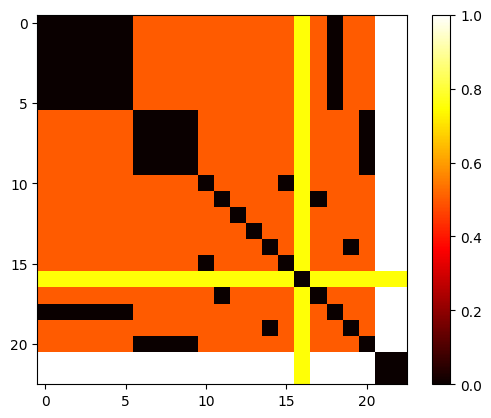

In [71]:
# Построение матрицы с цветовыми значениями
plt.imshow(matrix_elem_kat, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [72]:
# Функция для расчета евклидовой меры близости между объектами по времени заваривания
def similarity_measure(obj1, obj2):
    return np.linalg.norm(obj1 - obj2)

In [73]:
# получаем массив объектов по времени заваривания
objects = np.array(df['Время заваривания (секунд)'])
matrix_evklid_time = np.zeros((objects.shape[0], objects.shape[0]))

In [74]:
# Расчет значений меры для каждой пары объектов
for i in range(objects.shape[0]):
    for j in range(objects.shape[0]):
        matrix_evklid_time[i, j] = similarity_measure(objects[i], objects[j])

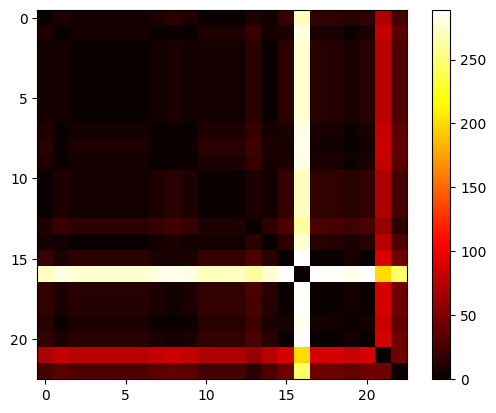

In [75]:
# Построение матрицы с цветовыми значениями
plt.imshow(matrix_evklid_time, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [76]:
# получаем массив объектов по температуре заваривания
objects = np.array(df['Температура заваривания C'])
matrix_evklid_temp = np.zeros((objects.shape[0], objects.shape[0]))

In [77]:
# Расчет значений меры для каждой пары объектов
for i in range(objects.shape[0]):
    for j in range(objects.shape[0]):
        matrix_evklid_temp[i, j] = similarity_measure(objects[i], objects[j])

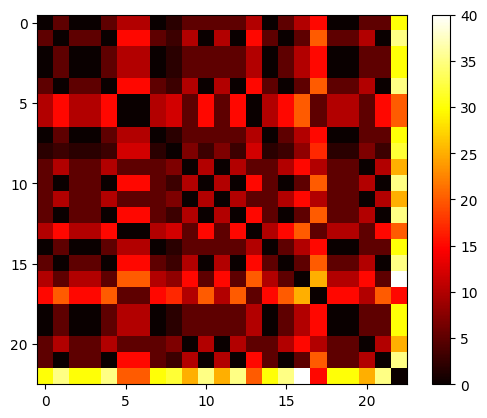

In [78]:
plt.imshow(matrix_evklid_temp, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [79]:
# Функция для расчета меры близости по коэффициенту Жаккара
def jaccard_similarity_measure(obj1, obj2):
    intersection = np.sum(np.logical_and(obj1, obj2))
    union = np.sum(np.logical_or(obj1, obj2))
    if intersection == 0 and union == 0:
        return 1
    else:
        return (intersection / union)

In [80]:
# получаем массив объектов по признаку веганский или нет (бинарная ассоциативная)
objects = np.array(df['Есть ароматизатор'].replace(to_replace=['False', 'True'], value=['0', '1'])).astype(int)
matrix_binary = np.zeros((objects.shape[0], objects.shape[0]))
for i in range(objects.shape[0]):
    for j in range(objects.shape[0]):
        matrix_binary[i, j] = jaccard_similarity_measure(objects[i], objects[j])

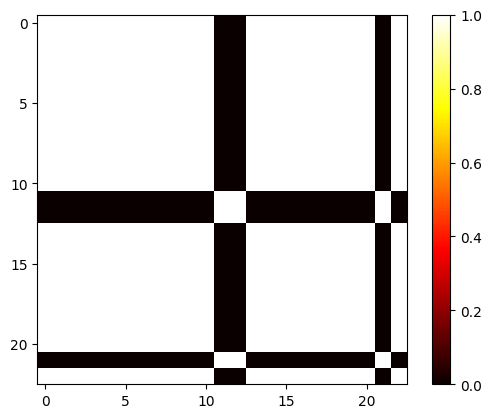

In [81]:
plt.imshow(matrix_binary, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

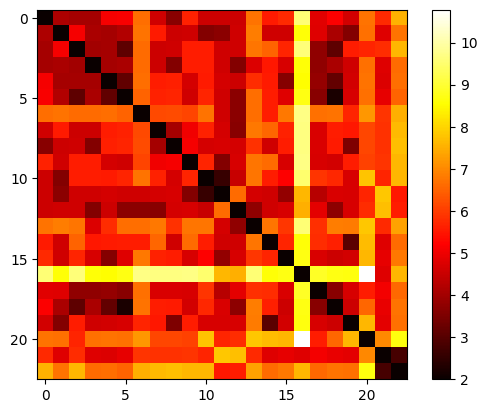

In [82]:
# создание общей меры близости
recomender_matrix = matrix_tree_main + matrix_elem_kat + matrix_evklid_temp * 0.01 + matrix_evklid_time * 0.01 + matrix_binary * 2

# Построение матрицы с цветовыми значениями
plt.imshow(recomender_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [83]:
def get_recommendations_by_likes(items, data):
    # Разбиваем входную строку на отдельные наименования
    titles = items.split(', ')
    num_objects = len(titles)

    # Индекс чая в датасете
    indices = pd.Series(df.index, index=df['Название']).drop_duplicates()

    # переменная для хранения общей близости
    total_similarity = 0.0

    try:
        for title in titles:
            # Получение индекса чая
            idx = indices[title]
            # Расчет близости для одного объекта и добавление в общую
            total_similarity = total_similarity + recomender_matrix[idx]
    except:
        return data

    # Расчет среднего значения близости
    average_similarity = total_similarity / num_objects

    # Список чая по близости
    sim_scores = list(enumerate(average_similarity))

    # Сортировка чая по близости
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=False)

    # Получение индексов наиболее похожего чая
    chai_indices = [i[0] for i in sim_scores]
    for title in titles:
        idx = indices[title]
        chai_indices.remove(idx)

    # Фильтруем индексы
    indices_from_filtered_df = (pd.Series(data.index, index=data['Название']).drop_duplicates()).tolist()
    indices_after_filter = []
    for index in chai_indices:
        if index in indices_from_filtered_df:
            indices_after_filter.append(index)

    # Вывод рекомендаций
    return data.loc[indices_after_filter]

In [84]:
# рекомендация по лайкам
#item = input("Введите название понравившегося чая:")
recommendations = get_recommendations_by_likes('Шайцинь Юцзи Шэн',df)
recommendations

,ID,Название,Категория,Форма упаковки,Есть ароматизатор,Температура заваривания C,Время заваривания (секунд),Состав,Вкус,стоимость
18,18,Юлэшань Шэн Ча,Пуэр,Россыпь,False,90,3,почки,"плотный, маслянистый, терпкий",930
2,2,Цзы Цзюань Ча,Пуэр,Россыпь,False,90,15,Чай пуэр,"плотный, маслянистый, терпкий, сладковатый",1300
4,4,Цзинмай Шэн Ча,Пуэр,Прессованный,False,95,15,Чай пуэр,"плотный, маслянистый, вяжущий",1960
17,17,Лао Цзюнь Шань Мао Цзянь,ЗЕЛЕНЫЙ ЧАЙ,Россыпь,False,75,2,почки,"плотный, маслянистый, сладковатый",2160
12,12,Грузинский красный ароматный,КРАСНЫЙ ЧАЙ,Россыпь,True,95,20,чайные листочки с длинными черенками,"сочный, шелковистый, пряный, терпкий",2760
3,3,Юньнань Бай Хао Бай Ча,Пуэр,Россыпь,False,90,15,Чай пуэр,"плотный, шелковистый, сладковатый",1760
1,1,Юцзи Гаоцзи Шу Ч,Пуэр,Россыпь,False,95,10,Чай пуэр,"плотный, мягкий, маслянистый",1760
9,9,Лишань Улун Циньвэй,Улун,Россыпь,False,85,10,Скрученные чайные побеги,"плотный, гладкий, маслянистый, сладкий",5900
11,11,Грузинский ароматный зелёный чай,ЗЕЛЕНЫЙ ЧАЙ,Россыпь,True,85,20,чайные листочки с длинными черенками,"чистый, гладкий, сладкий, маслянистый",1750
19,19,Хуасян Бай Му Дань,БЕЛЫЙ ЧАЙ,Россыпь,False,90,7,листики и черенки,"плотный, мягкий, шелковистый",1830


In [85]:
def do_fliter(recomendation, name=None, category=None, form=None, is_arom=None, temp=[None, None], time=[None, None],
              price=None, taste=None):
    # from expert_options.csv
    term_to_price = {
        'Очень дешевый': lambda x: int(x) <= 1000,
        'Дешевый': lambda x: 1000 < int(x) <= 1750,
        'Средний': lambda x: 1750 < int(x) <= 3000,
        'Дорогой': lambda x: 3000 < int(x) <= 4750,
        'Очень дорогой': lambda x: int(x) > 4750,
    }

    if name is not None:
        recomendation = recomendation[recomendation['Название'].apply(lambda x: x.find(name) != -1)]

    if category is not None:
        recomendation = recomendation[recomendation['Категория'].apply(lambda x: x == category)]

    if form is not None:
        recomendation = recomendation[recomendation['Форма упаковки'].apply(lambda x: x == form)]

    if is_arom is not None:
        recomendation = recomendation[recomendation['Есть ароматизатор'].apply(lambda x: x == is_arom)]

    if temp[0] is not None and temp[1] is not None:
        recomendation = recomendation[
            recomendation['Температура заваривания C'].apply(lambda x: temp[0] < int(x) <= temp[1])]

    if time[0] is not None and time[1] is not None:
        recomendation = recomendation[
            recomendation['Время заваривания (секунд)'].apply(lambda x: time[0] < int(x) <= time[1])]

    if taste is not None:
        recomendation = recomendation[recomendation['Вкус'].apply(lambda x: x.find(name) != -1)]

    if price is not None:
        recomendation = recomendation[recomendation['стоимость'].apply(term_to_price[price])]

    return recomendation

In [86]:
result = do_fliter(recommendations,name='а', is_arom=True, temp=[0, 100])
result

,ID,Название,Категория,Форма упаковки,Есть ароматизатор,Температура заваривания C,Время заваривания (секунд),Состав,Вкус,стоимость
12,12,Грузинский красный ароматный,КРАСНЫЙ ЧАЙ,Россыпь,True,95,20,чайные листочки с длинными черенками,"сочный, шелковистый, пряный, терпкий",2760
11,11,Грузинский ароматный зелёный чай,ЗЕЛЕНЫЙ ЧАЙ,Россыпь,True,85,20,чайные листочки с длинными черенками,"чистый, гладкий, сладкий, маслянистый",1750
21,21,Сублимированный чай Lord Nelson персик,Растворимый,Россыпь,True,95,90,"Сироп глюкозы, экстракт сока персика, экстракт...",Персик,350


In [87]:
rs= get_recommendations_by_likes('Путь Сердца', result)
rs

,ID,Название,Категория,Форма упаковки,Есть ароматизатор,Температура заваривания C,Время заваривания (секунд),Состав,Вкус,стоимость
11,11,Грузинский ароматный зелёный чай,ЗЕЛЕНЫЙ ЧАЙ,Россыпь,True,85,20,чайные листочки с длинными черенками,"чистый, гладкий, сладкий, маслянистый",1750
12,12,Грузинский красный ароматный,КРАСНЫЙ ЧАЙ,Россыпь,True,95,20,чайные листочки с длинными черенками,"сочный, шелковистый, пряный, терпкий",2760
21,21,Сублимированный чай Lord Nelson персик,Растворимый,Россыпь,True,95,90,"Сироп глюкозы, экстракт сока персика, экстракт...",Персик,350
